# Prepare data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load data

In [2]:
df = pd.read_csv('airdata_austria.csv')
df

,Unnamed: 0,Countrycode,Namespace,AirQualityNetwork,AirQualityStation,AirQualityStationEoICode,SamplingPoint,SamplingProcess,Sample,AirPollutant,AirPollutantCode,AveragingTime,Concentration,UnitOfMeasurement,DatetimeBegin,DatetimeEnd,Validity,Verification
0,0,AT,AT.0008.20.AQ,NET.01,STA.01.0001,AT10001,SPO.01.0001.65188.6001.1,SPP.01.0001.65188.6001.1.11390,SAM.01.0001.65188.6001.1,PM2.5,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,54.116173,µg/m3,2016-01-01 19:00:00 +01:00,2016-01-01 20:00:00 +01:00,1,1
1,1,AT,AT.0008.20.AQ,NET.01,STA.01.0001,AT10001,SPO.01.0001.65188.6001.1,SPP.01.0001.65188.6001.1.11390,SAM.01.0001.65188.6001.1,PM2.5,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,40.169502,µg/m3,2016-01-01 11:00:00 +01:00,2016-01-01 12:00:00 +01:00,1,1
2,2,AT,AT.0008.20.AQ,NET.01,STA.01.0001,AT10001,SPO.01.0001.65188.6001.1,SPP.01.0001.65188.6001.1.11390,SAM.01.0001.65188.6001.1,PM2.5,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,39.500725,µg/m3,2016-01-01 08:00:00 +01:00,2016-01-01 09:00:00 +01:00,1,1
3,3,AT,AT.0008.20.AQ,NET.01,STA.01.0001,AT10001,SPO.01.0001.65188.6001.1,SPP.01.0001.65188.6001.1.11390,SAM.01.0001.65188.6001.1,PM2.5,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,39.656170,µg/m3,2016-01-01 12:00:00 +01:00,2016-01-01 13:00:00 +01:00,1,1
4,4,AT,AT.0008.20.AQ,NET.01,STA.01.0001,AT10001,SPO.01.0001.65188.6001.1,SPP.01.0001.65188.6001.1.11390,SAM.01.0001.65188.6001.1,PM2.5,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,44.012245,µg/m3,2016-01-01 17:00:00 +01:00,2016-01-01 18:00:00 +01:00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4376268,8779,AT,AT.0008.20.AQ,NET.10,STA.10.SON1,AT0SON1,SPO.10.SON1.352.10.1,SPP.10.SON1.352.10.1.5088,SAM.10.SON1.352.10.1,CO,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,0.119357,mg/m3,2016-12-10 09:00:00 +01:00,2016-12-10 10:00:00 +01:00,1,1
4376269,8780,AT,AT.0008.20.AQ,NET.10,STA.10.SON1,AT0SON1,SPO.10.SON1.352.10.1,SPP.10.SON1.352.10.1.5088,SAM.10.SON1.352.10.1,CO,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,0.120329,mg/m3,2016-12-09 11:00:00 +01:00,2016-12-09 12:00:00 +01:00,1,1
4376270,8781,AT,AT.0008.20.AQ,NET.10,STA.10.SON1,AT0SON1,SPO.10.SON1.352.10.1,SPP.10.SON1.352.10.1.5088,SAM.10.SON1.352.10.1,CO,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,0.111598,mg/m3,2016-12-10 08:00:00 +01:00,2016-12-10 09:00:00 +01:00,1,1
4376271,8782,AT,AT.0008.20.AQ,NET.10,STA.10.SON1,AT0SON1,SPO.10.SON1.352.10.1,SPP.10.SON1.352.10.1.5088,SAM.10.SON1.352.10.1,CO,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,0.117710,mg/m3,2016-12-10 15:00:00 +01:00,2016-12-10 16:00:00 +01:00,1,1


Delete unused columns

In [3]:
dropped_columns = df.drop([ 'DatetimeBegin', 'Validity', 'Verification', 'UnitOfMeasurement',
                                        'AirPollutantCode','AveragingTime', 'AirQualityStationEoICode',
                                        'SamplingPoint','SamplingProcess', 'Sample', 'Unnamed: 0', 'Countrycode', 'Namespace', 'AirQualityNetwork' ],
                                      axis=1)
dropped_columns

,AirQualityStation,AirPollutant,Concentration,DatetimeEnd
0,STA.01.0001,PM2.5,54.116173,2016-01-01 20:00:00 +01:00
1,STA.01.0001,PM2.5,40.169502,2016-01-01 12:00:00 +01:00
2,STA.01.0001,PM2.5,39.500725,2016-01-01 09:00:00 +01:00
3,STA.01.0001,PM2.5,39.656170,2016-01-01 13:00:00 +01:00
4,STA.01.0001,PM2.5,44.012245,2016-01-01 18:00:00 +01:00
...,...,...,...,...
4376268,STA.10.SON1,CO,0.119357,2016-12-10 10:00:00 +01:00
4376269,STA.10.SON1,CO,0.120329,2016-12-09 12:00:00 +01:00
4376270,STA.10.SON1,CO,0.111598,2016-12-10 09:00:00 +01:00
4376271,STA.10.SON1,CO,0.117710,2016-12-10 16:00:00 +01:00


Make polutant columns

In [4]:
x = dropped_columns
pollutant_cols = x.pivot_table(index=['AirQualityStation','DatetimeEnd' ],columns=['AirPollutant'])
pollutant_cols

Concentration                     \
AirPollutant                                            CO        NO2      O3   
AirQualityStation DatetimeEnd                                                   
STA.01.0001       2016-01-01 01:00:00 +01:00      0.568647  21.235424  10.599   
                  2016-01-01 02:00:00 +01:00      0.438731  10.855110  22.182   
                  2016-01-01 03:00:00 +01:00      0.519419  19.417685  11.303   
                  2016-01-01 04:00:00 +01:00      0.467832  19.030775  10.492   
                  2016-01-01 05:00:00 +01:00      0.482332  22.672871   5.867   
...                                                    ...        ...     ...   
STA.10.ZOE2       2016-12-31 20:00:00 +01:00           NaN   1.185878  86.111   
                  2016-12-31 21:00:00 +01:00           NaN   0.890649  87.441   
                  2016-12-31 22:00:00 +01:00           NaN   0.857297  87.910   
                  2016-12-31 23:00:00 +01:00           NaN   0.671625  88.786   
                  2017-01-01 00:00:00 +01:00           NaN   0.643858  89.267   

                                                                           
AirPollutant                                       PM10      PM2.5    SO2  
AirQualityStation DatetimeEnd                                              
STA.01.0001       2016-01-01 01:00:00 +01:00        NaN  47.786304  2.175  
                  2016-01-01 02:00:00 +01:00  55.539261  35.708588  2.070  
                  2016-01-01 03:00:00 +01:00  55.920967  36.934074  1.940  
                  2016-01-01 04:00:00 +01:00  56.757950  37.360641  1.860  
                  2016-01-01 05:00:00 +01:00  65.157158  42.334885  1.900  
...                                                 ...        ...    ...  
STA.10.ZOE2       2016-12-31 20:00:00 +01:00   0.731000   0.643200    NaN  
                  2016-12-31 21:00:00 +01:00   0.659600   0.582400    NaN  
                  2016-12-31 22:00:00 +01:00   0.731000   0.627200    NaN  
                  2016-12-31 23:00:00 +01:00   0.707200   0.598400    NaN  
                  2017-01-01 00:00:00 +01:00   0.771800   0.633600    NaN  

[1517520 rows x 6 columns]

Convert pivot table to dataframe

In [5]:
flattened = pd.DataFrame(pollutant_cols.to_records())
flattened

,AirQualityStation,DatetimeEnd,"('Concentration', 'CO')","('Concentration', 'NO2')","('Concentration', 'O3')","('Concentration', 'PM10')","('Concentration', 'PM2.5')","('Concentration', 'SO2')"
0,STA.01.0001,2016-01-01 01:00:00 +01:00,0.568647,21.235424,10.599,NaN,47.786304,2.175
1,STA.01.0001,2016-01-01 02:00:00 +01:00,0.438731,10.855110,22.182,55.539261,35.708588,2.070
2,STA.01.0001,2016-01-01 03:00:00 +01:00,0.519419,19.417685,11.303,55.920967,36.934074,1.940
3,STA.01.0001,2016-01-01 04:00:00 +01:00,0.467832,19.030775,10.492,56.757950,37.360641,1.860
4,STA.01.0001,2016-01-01 05:00:00 +01:00,0.482332,22.672871,5.867,65.157158,42.334885,1.900
...,...,...,...,...,...,...,...,...
1517515,STA.10.ZOE2,2016-12-31 20:00:00 +01:00,NaN,1.185878,86.111,0.731000,0.643200,NaN
1517516,STA.10.ZOE2,2016-12-31 21:00:00 +01:00,NaN,0.890649,87.441,0.659600,0.582400,NaN
1517517,STA.10.ZOE2,2016-12-31 22:00:00 +01:00,NaN,0.857297,87.910,0.731000,0.627200,NaN
1517518,STA.10.ZOE2,2016-12-31 23:00:00 +01:00,NaN,0.671625,88.786,0.707200,0.598400,NaN


Fill null values

In [6]:
x_no_missing = flattened.fillna(method='pad')
x_no_missing = x_no_missing.fillna(method='bfill')
x_no_missing.isnull().sum(axis = 0)

AirQualityStation             0
DatetimeEnd                   0
('Concentration', 'CO')       0
('Concentration', 'NO2')      0
('Concentration', 'O3')       0
('Concentration', 'PM10')     0
('Concentration', 'PM2.5')    0
('Concentration', 'SO2')      0
dtype: int64

Rename columns

In [7]:
x = x_no_missing
x.columns = ['station_id', 'datetime', 'CO', 'NO2', 'O3', 'PM10', 'PM2.5', 'SO2']
x_renamed = x
x_renamed

,station_id,datetime,CO,NO2,O3,PM10,PM2.5,SO2
0,STA.01.0001,2016-01-01 01:00:00 +01:00,0.568647,21.235424,10.599,55.539261,47.786304,2.175
1,STA.01.0001,2016-01-01 02:00:00 +01:00,0.438731,10.855110,22.182,55.539261,35.708588,2.070
2,STA.01.0001,2016-01-01 03:00:00 +01:00,0.519419,19.417685,11.303,55.920967,36.934074,1.940
3,STA.01.0001,2016-01-01 04:00:00 +01:00,0.467832,19.030775,10.492,56.757950,37.360641,1.860
4,STA.01.0001,2016-01-01 05:00:00 +01:00,0.482332,22.672871,5.867,65.157158,42.334885,1.900
...,...,...,...,...,...,...,...,...
1517515,STA.10.ZOE2,2016-12-31 20:00:00 +01:00,0.120084,1.185878,86.111,0.731000,0.643200,0.130
1517516,STA.10.ZOE2,2016-12-31 21:00:00 +01:00,0.120084,0.890649,87.441,0.659600,0.582400,0.130
1517517,STA.10.ZOE2,2016-12-31 22:00:00 +01:00,0.120084,0.857297,87.910,0.731000,0.627200,0.130
1517518,STA.10.ZOE2,2016-12-31 23:00:00 +01:00,0.120084,0.671625,88.786,0.707200,0.598400,0.130


Adjust dates

In [8]:
x = x_renamed
x['datetime'] = x['datetime'].astype('datetime64[ns]')

In [9]:
x['year'] = x.datetime.dt.year
x['month'] = x.datetime.dt.month
x['day'] = x.datetime.dt.day
x_date = x
x_date

,station_id,datetime,CO,NO2,O3,PM10,PM2.5,SO2,year,month,day
0,STA.01.0001,2016-01-01 00:00:00,0.568647,21.235424,10.599,55.539261,47.786304,2.175,2016,1,1
1,STA.01.0001,2016-01-01 01:00:00,0.438731,10.855110,22.182,55.539261,35.708588,2.070,2016,1,1
2,STA.01.0001,2016-01-01 02:00:00,0.519419,19.417685,11.303,55.920967,36.934074,1.940,2016,1,1
3,STA.01.0001,2016-01-01 03:00:00,0.467832,19.030775,10.492,56.757950,37.360641,1.860,2016,1,1
4,STA.01.0001,2016-01-01 04:00:00,0.482332,22.672871,5.867,65.157158,42.334885,1.900,2016,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1517515,STA.10.ZOE2,2016-12-31 19:00:00,0.120084,1.185878,86.111,0.731000,0.643200,0.130,2016,12,31
1517516,STA.10.ZOE2,2016-12-31 20:00:00,0.120084,0.890649,87.441,0.659600,0.582400,0.130,2016,12,31
1517517,STA.10.ZOE2,2016-12-31 21:00:00,0.120084,0.857297,87.910,0.731000,0.627200,0.130,2016,12,31
1517518,STA.10.ZOE2,2016-12-31 22:00:00,0.120084,0.671625,88.786,0.707200,0.598400,0.130,2016,12,31


Rename stations

In [10]:
stations = x_date.station_id.unique()
x = x_date
for i in range(0,len(stations)):
    x.loc[x['station_id'] == stations[i], 'station_id'] = i + 1
x_final = x


Create index

In [11]:
x_indexed = x_final.set_index(['station_id', 'year', 'month','day','datetime'])
x_indexed

CO        NO2      O3  \
station_id year month day datetime                                           
1          2016 1     1   2016-01-01 00:00:00  0.568647  21.235424  10.599   
                          2016-01-01 01:00:00  0.438731  10.855110  22.182   
                          2016-01-01 02:00:00  0.519419  19.417685  11.303   
                          2016-01-01 03:00:00  0.467832  19.030775  10.492   
                          2016-01-01 04:00:00  0.482332  22.672871   5.867   
...                                                 ...        ...     ...   
176        2016 12    31  2016-12-31 19:00:00  0.120084   1.185878  86.111   
                          2016-12-31 20:00:00  0.120084   0.890649  87.441   
                          2016-12-31 21:00:00  0.120084   0.857297  87.910   
                          2016-12-31 22:00:00  0.120084   0.671625  88.786   
                          2016-12-31 23:00:00  0.120084   0.643858  89.267   

                                                    PM10      PM2.5    SO2  
station_id year month day datetime                                          
1          2016 1     1   2016-01-01 00:00:00  55.539261  47.786304  2.175  
                          2016-01-01 01:00:00  55.539261  35.708588  2.070  
                          2016-01-01 02:00:00  55.920967  36.934074  1.940  
                          2016-01-01 03:00:00  56.757950  37.360641  1.860  
                          2016-01-01 04:00:00  65.157158  42.334885  1.900  
...                                                  ...        ...    ...  
176        2016 12    31  2016-12-31 19:00:00   0.731000   0.643200  0.130  
                          2016-12-31 20:00:00   0.659600   0.582400  0.130  
                          2016-12-31 21:00:00   0.731000   0.627200  0.130  
                          2016-12-31 22:00:00   0.707200   0.598400  0.130  
                          2016-12-31 23:00:00   0.771800   0.633600  0.130  

[1517520 rows x 6 columns]

Drop duplicates

In [12]:
print(x_indexed.shape)
x_indexed = x_indexed.drop_duplicates()
x_indexed.shape

(1517520, 6)


(1464376, 6)

In [13]:
x_indexed.reset_index()

,station_id,year,month,day,datetime,CO,NO2,O3,PM10,PM2.5,SO2
0,1,2016,1,1,2016-01-01 00:00:00,0.568647,21.235424,10.599,55.539261,47.786304,2.175
1,1,2016,1,1,2016-01-01 01:00:00,0.438731,10.855110,22.182,55.539261,35.708588,2.070
2,1,2016,1,1,2016-01-01 02:00:00,0.519419,19.417685,11.303,55.920967,36.934074,1.940
3,1,2016,1,1,2016-01-01 03:00:00,0.467832,19.030775,10.492,56.757950,37.360641,1.860
4,1,2016,1,1,2016-01-01 04:00:00,0.482332,22.672871,5.867,65.157158,42.334885,1.900
...,...,...,...,...,...,...,...,...,...,...,...
1464371,176,2016,12,31,2016-12-31 19:00:00,0.120084,1.185878,86.111,0.731000,0.643200,0.130
1464372,176,2016,12,31,2016-12-31 20:00:00,0.120084,0.890649,87.441,0.659600,0.582400,0.130
1464373,176,2016,12,31,2016-12-31 21:00:00,0.120084,0.857297,87.910,0.731000,0.627200,0.130
1464374,176,2016,12,31,2016-12-31 22:00:00,0.120084,0.671625,88.786,0.707200,0.598400,0.130


Number of measurements per station

In [14]:
x_indexed

CO        NO2      O3  \
station_id year month day datetime                                           
1          2016 1     1   2016-01-01 00:00:00  0.568647  21.235424  10.599   
                          2016-01-01 01:00:00  0.438731  10.855110  22.182   
                          2016-01-01 02:00:00  0.519419  19.417685  11.303   
                          2016-01-01 03:00:00  0.467832  19.030775  10.492   
                          2016-01-01 04:00:00  0.482332  22.672871   5.867   
...                                                 ...        ...     ...   
176        2016 12    31  2016-12-31 19:00:00  0.120084   1.185878  86.111   
                          2016-12-31 20:00:00  0.120084   0.890649  87.441   
                          2016-12-31 21:00:00  0.120084   0.857297  87.910   
                          2016-12-31 22:00:00  0.120084   0.671625  88.786   
                          2016-12-31 23:00:00  0.120084   0.643858  89.267   

                                                    PM10      PM2.5    SO2  
station_id year month day datetime                                          
1          2016 1     1   2016-01-01 00:00:00  55.539261  47.786304  2.175  
                          2016-01-01 01:00:00  55.539261  35.708588  2.070  
                          2016-01-01 02:00:00  55.920967  36.934074  1.940  
                          2016-01-01 03:00:00  56.757950  37.360641  1.860  
                          2016-01-01 04:00:00  65.157158  42.334885  1.900  
...                                                  ...        ...    ...  
176        2016 12    31  2016-12-31 19:00:00   0.731000   0.643200  0.130  
                          2016-12-31 20:00:00   0.659600   0.582400  0.130  
                          2016-12-31 21:00:00   0.731000   0.627200  0.130  
                          2016-12-31 22:00:00   0.707200   0.598400  0.130  
                          2016-12-31 23:00:00   0.771800   0.633600  0.130  

[1464376 rows x 6 columns]

In [15]:
x = x_indexed.reset_index()
x = x.drop(['datetime','year', 'month','day'], axis=1)
data_per_station = x.groupby('station_id').count()
data_per_station['SO2'].sort_values()
max_stations = data_per_station[data_per_station['SO2'] > 8782].reset_index()['station_id']
max_stations

0       1
1      14
2      28
3      49
4      58
5      90
6     111
7     114
8     115
9     127
10    134
11    138
12    140
13    142
14    143
15    153
16    155
17    160
18    166
19    168
Name: station_id, dtype: int64

We have data for 176 stations, we take for 20 station with most data, were we have 8783 or 8784 measurements for the 2016 year.

In [16]:
x = x_indexed.reset_index()
x = x[x['station_id'].isin(max_stations.values)]
x

,station_id,year,month,day,datetime,CO,NO2,O3,PM10,PM2.5,SO2
0,1,2016,1,1,2016-01-01 00:00:00,0.568647,21.235424,10.599,55.539261,47.786304,2.175000
1,1,2016,1,1,2016-01-01 01:00:00,0.438731,10.855110,22.182,55.539261,35.708588,2.070000
2,1,2016,1,1,2016-01-01 02:00:00,0.519419,19.417685,11.303,55.920967,36.934074,1.940000
3,1,2016,1,1,2016-01-01 03:00:00,0.467832,19.030775,10.492,56.757950,37.360641,1.860000
4,1,2016,1,1,2016-01-01 04:00:00,0.482332,22.672871,5.867,65.157158,42.334885,1.900000
...,...,...,...,...,...,...,...,...,...,...,...
1394213,168,2016,12,31,2016-12-31 19:00:00,0.905058,88.721634,6.473,63.080498,17.275999,4.451838
1394214,168,2016,12,31,2016-12-31 20:00:00,0.883059,89.236031,6.473,68.617004,17.275999,4.451838
1394215,168,2016,12,31,2016-12-31 21:00:00,0.932093,78.818832,6.473,85.209503,17.275999,4.451838
1394216,168,2016,12,31,2016-12-31 22:00:00,1.071982,87.186066,6.473,98.615997,17.275999,4.451838


## Plots

In [17]:
monthly_line = x.drop(['station_id', 'year', 'datetime'], axis=1)
monthly_line = monthly_line.groupby(['month', 'day']).aggregate('mean')
monthly_line

CO        NO2         O3       PM10      PM2.5       SO2
month day                                                                
1     1    0.925481  30.807515  15.490950  60.301412  46.988765  3.193153
      2    0.904130  26.689192  16.747023  40.657280  45.356047  3.531415
      3    0.866588  21.804641  24.109835  30.849021  38.987393  4.319078
      4    0.888185  26.208834  22.068627  33.152943  37.355505  5.450006
      5    0.940601  32.899558  17.742737  44.939009  40.180905  4.269443
...             ...        ...        ...        ...        ...       ...
12    27   0.804652  15.150904  32.304183   9.114747  29.420111  2.900950
      28   0.812241  22.126055  29.098019   9.119867  27.933647  3.068627
      29   0.859873  34.803448  23.098271  17.337443  29.134572  3.119212
      30   0.923957  47.071326  16.774227  26.272666  32.306511  3.304830
      31   0.973222  48.751213  15.218094  38.336124  36.969029  3.506438

[366 rows x 6 columns]

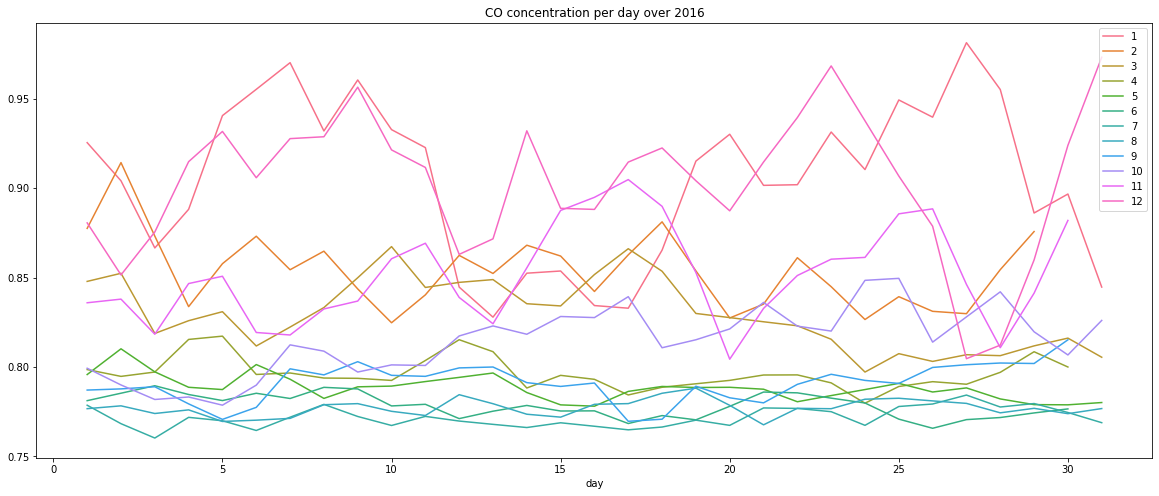

In [18]:
monthly_line_CO = monthly_line.loc[:, 'CO'].reset_index()
monthly_line_CO_wide = monthly_line_CO.pivot("day", "month", "CO")
fig, ax = plt.subplots(figsize=(20,8))
sns_plot = sns.lineplot(data=monthly_line_CO_wide, dashes=False, ax=ax).set_title('CO concentration per day over 2016')
fig = sns_plot.get_figure()
fig.savefig("COmonthly.png") 

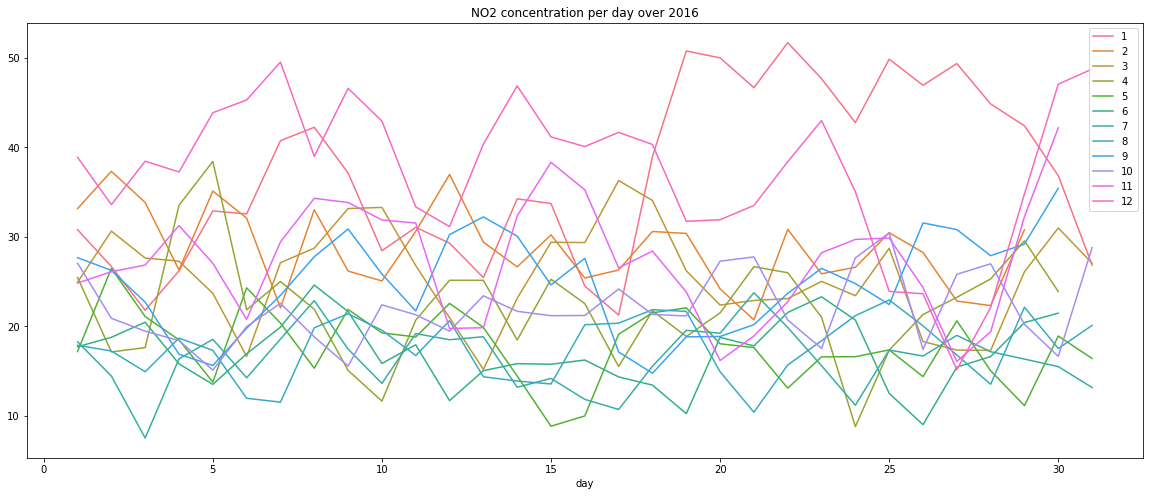

In [19]:
monthly_line_NO2 = monthly_line.loc[:, 'NO2'].reset_index()
monthly_line_NO2_wide = monthly_line_NO2.pivot("day", "month", "NO2")
fig, ax = plt.subplots(figsize=(20,8))
sns_plot = sns.lineplot(data=monthly_line_NO2_wide, dashes=False, ax=ax).set_title('NO2 concentration per day over 2016')
fig = sns_plot.get_figure()
fig.savefig("NO2monthly.png") 

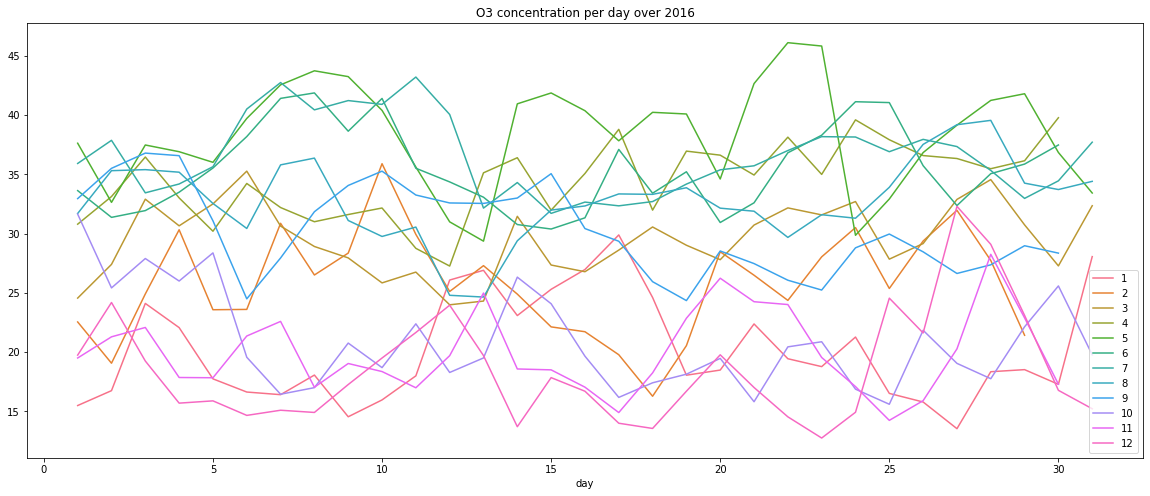

In [20]:
monthly_line_O3 = monthly_line.loc[:, 'O3'].reset_index()
monthly_line_O3_wide = monthly_line_O3.pivot("day", "month", "O3")
fig, ax = plt.subplots(figsize=(20,8))
sns_plot = sns.lineplot(data=monthly_line_O3_wide, dashes=False, ax=ax).set_title('O3 concentration per day over 2016')
fig = sns_plot.get_figure()
fig.savefig("O3monthly.png") 

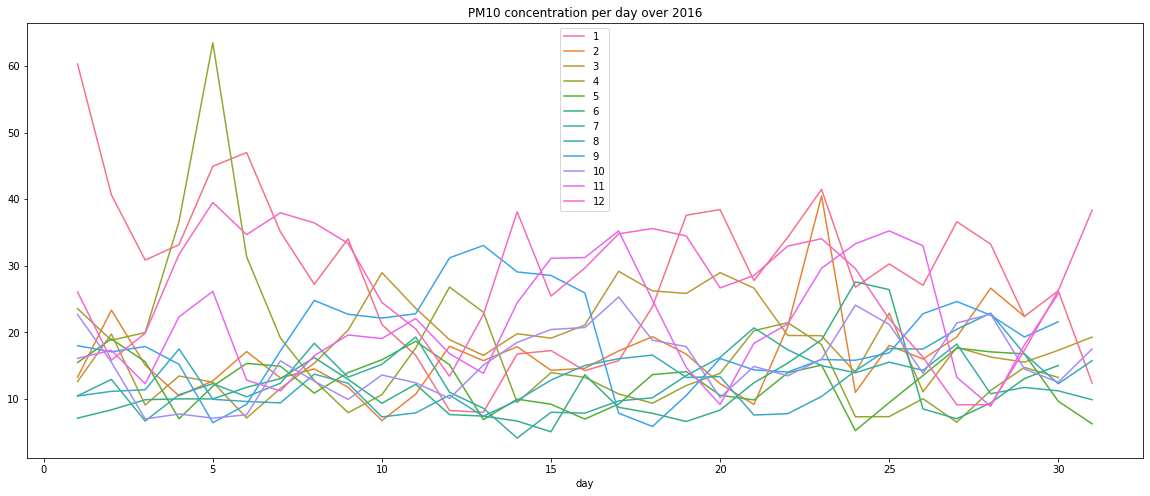

In [21]:
monthly_line_PM10 = monthly_line.loc[:, 'PM10'].reset_index()
monthly_line_PM10_wide = monthly_line_PM10.pivot("day", "month", "PM10")
fig, ax = plt.subplots(figsize=(20,8))
sns_plot = sns.lineplot(data=monthly_line_PM10_wide, dashes=False, ax=ax).set_title('PM10 concentration per day over 2016')
fig = sns_plot.get_figure()
fig.savefig("PM10monthly.png") 

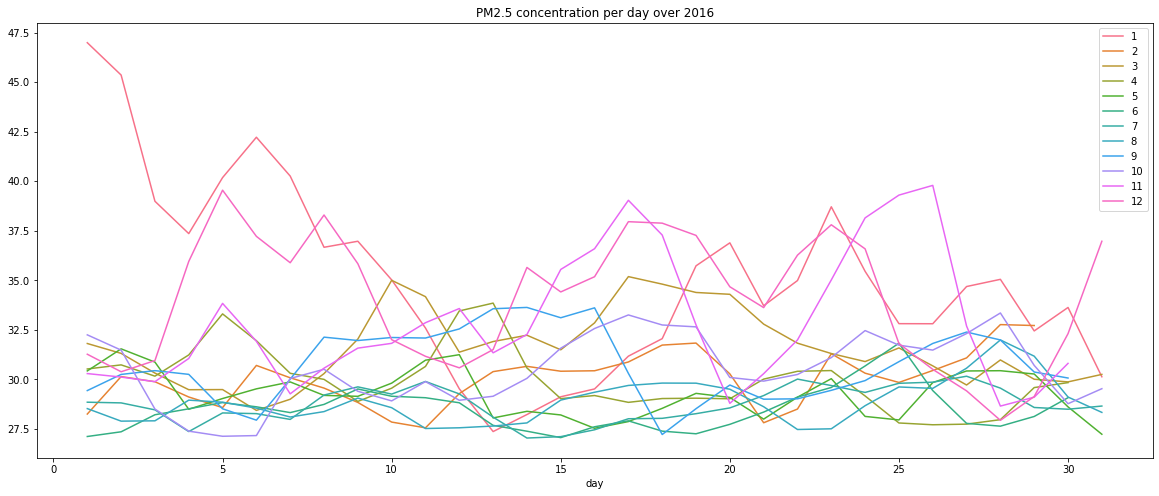

In [22]:
monthly_line_PM25 = monthly_line.loc[:, 'PM2.5'].reset_index()
monthly_line_PM25_wide = monthly_line_PM25.pivot("day", "month", "PM2.5")
fig, ax = plt.subplots(figsize=(20,8))
sns_plot = sns.lineplot(data=monthly_line_PM25_wide, dashes=False, ax=ax).set_title('PM2.5 concentration per day over 2016')
fig = sns_plot.get_figure()
fig.savefig("PM2.5monthly.png") 

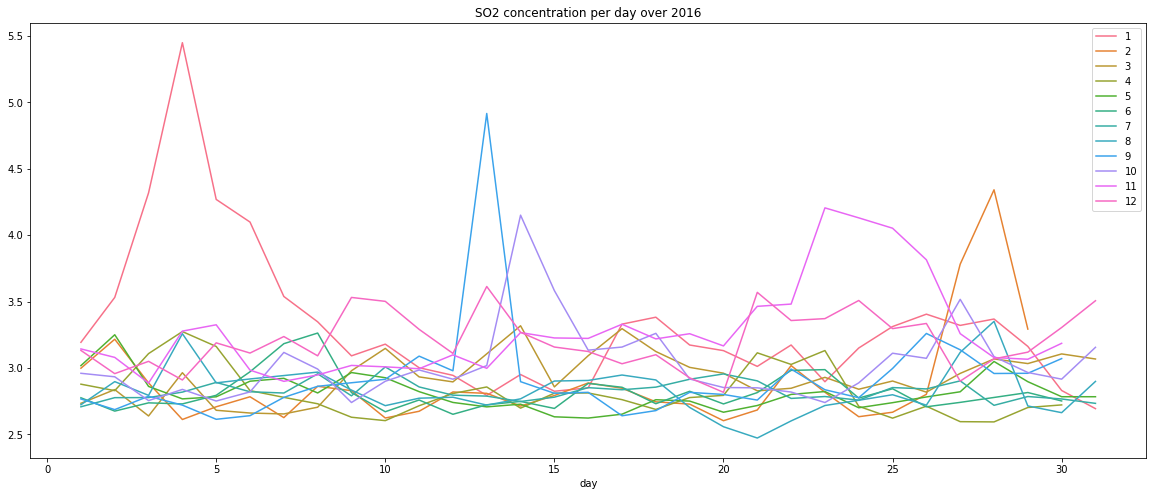

In [23]:
monthly_line_SO2 = monthly_line.loc[:, 'SO2'].reset_index()
monthly_line_SO2_wide = monthly_line_SO2.pivot("day", "month", "SO2")
fig, ax = plt.subplots(figsize=(20,8))
sns_plot = sns.lineplot(data=monthly_line_SO2_wide, dashes=False, ax=ax).set_title('SO2 concentration per day over 2016')
fig = sns_plot.get_figure()
fig.savefig("SO2monthly.png") 

In [24]:
df = x.drop(['year','month','day','datetime'], axis=1)
df['station_id'] = df['station_id'].astype('object')
df = df.set_index('station_id')
x = df.reset_index()
stations = x.station_id.unique()
stations
for index, station in enumerate(stations):
    x.loc[x['station_id'] == station,'station_id'] = index + 1
    
df = x.set_index('station_id')
df

,CO,NO2,O3,PM10,PM2.5,SO2
station_id,,,,,,
1,0.568647,21.235424,10.599,55.539261,47.786304,2.175000
1,0.438731,10.855110,22.182,55.539261,35.708588,2.070000
1,0.519419,19.417685,11.303,55.920967,36.934074,1.940000
1,0.467832,19.030775,10.492,56.757950,37.360641,1.860000
1,0.482332,22.672871,5.867,65.157158,42.334885,1.900000
...,...,...,...,...,...,...
20,0.905058,88.721634,6.473,63.080498,17.275999,4.451838
20,0.883059,89.236031,6.473,68.617004,17.275999,4.451838
20,0.932093,78.818832,6.473,85.209503,17.275999,4.451838


In [46]:
station_box = df.reset_index()
station_box_all = station_box.drop('station_id', axis=1)
dft = station_box_all
station_box_scaled = pd.DataFrame(MinMaxScaler().fit_transform(dft.values), columns=dft.columns, index=dft.index)
station_box_scaled


,CO,NO2,O3,PM10,PM2.5,SO2
0,0.169330,0.126807,0.054590,0.158492,0.232339,0.025507
1,0.130644,0.064821,0.114249,0.158492,0.173617,0.024275
2,0.154671,0.115952,0.058216,0.159249,0.179575,0.022751
3,0.139309,0.113642,0.054039,0.160908,0.181649,0.021813
4,0.143627,0.135390,0.030218,0.177558,0.205834,0.022282
...,...,...,...,...,...,...
175668,0.269505,0.529798,0.033339,0.173441,0.083997,0.052208
175669,0.262955,0.532870,0.033339,0.184416,0.083997,0.052208
175670,0.277556,0.470664,0.033339,0.217307,0.083997,0.052208
175671,0.319211,0.520629,0.033339,0.243882,0.083997,0.052208


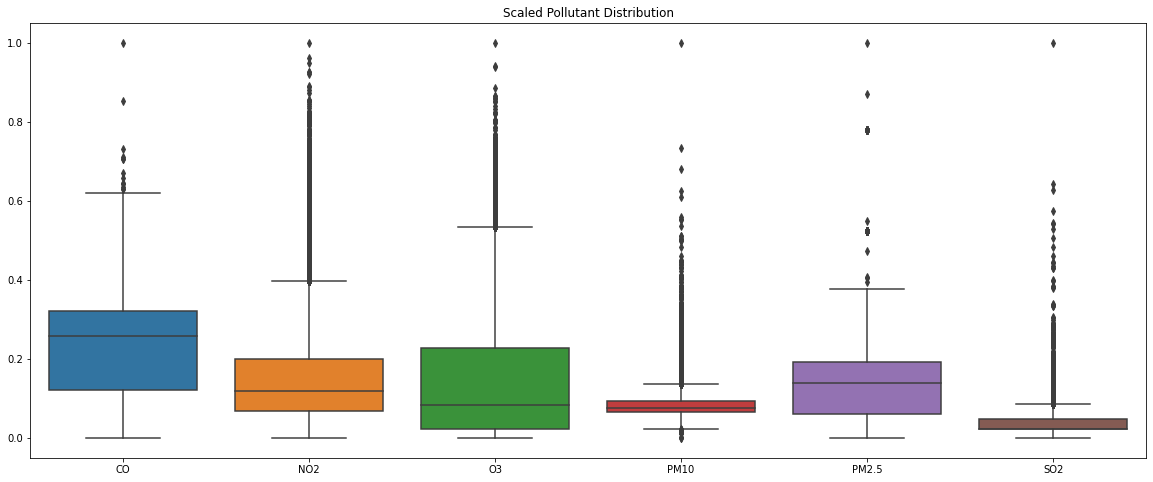

In [47]:
fig, ax = plt.subplots(figsize=(20,8))
sns_plot = sns.boxplot(data=station_box_scaled,ax=ax).set_title('Scaled Pollutant Distribution')
fig = sns_plot.get_figure()
fig.savefig("BoxPlotPollutants.png") 

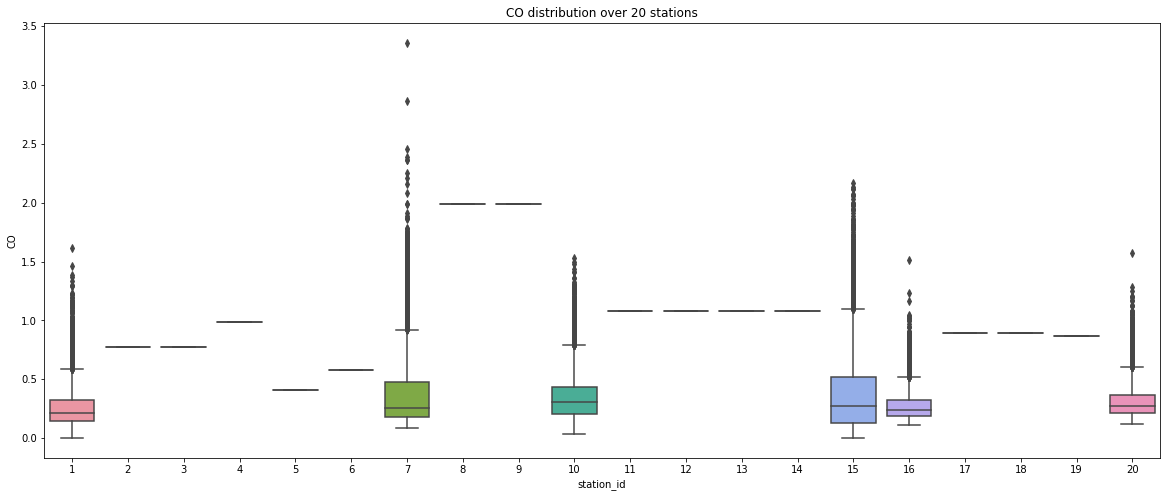

In [26]:
fig, ax = plt.subplots(figsize=(20,8))
sns_plot = sns.boxplot(x='station_id', y='CO', data=station_box,ax=ax).set_title('CO distribution over 20 stations')
fig = sns_plot.get_figure()
fig.savefig("COstations.png") 

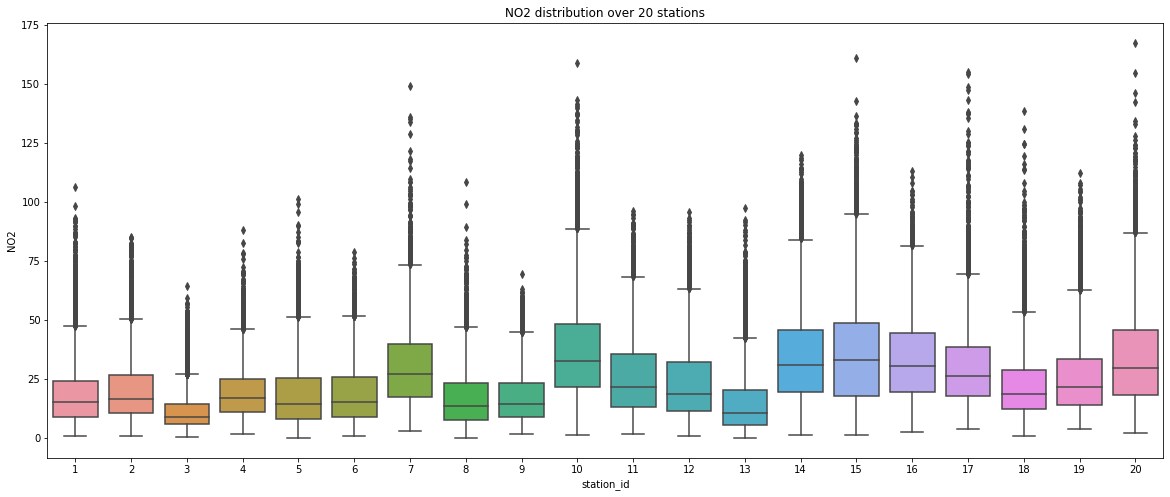

In [27]:
fig, ax = plt.subplots(figsize=(20,8))
sns_plot = sns.boxplot(x='station_id', y='NO2', data=station_box,ax=ax).set_title('NO2 distribution over 20 stations')
fig = sns_plot.get_figure()
fig.savefig("NO2stations.png") 

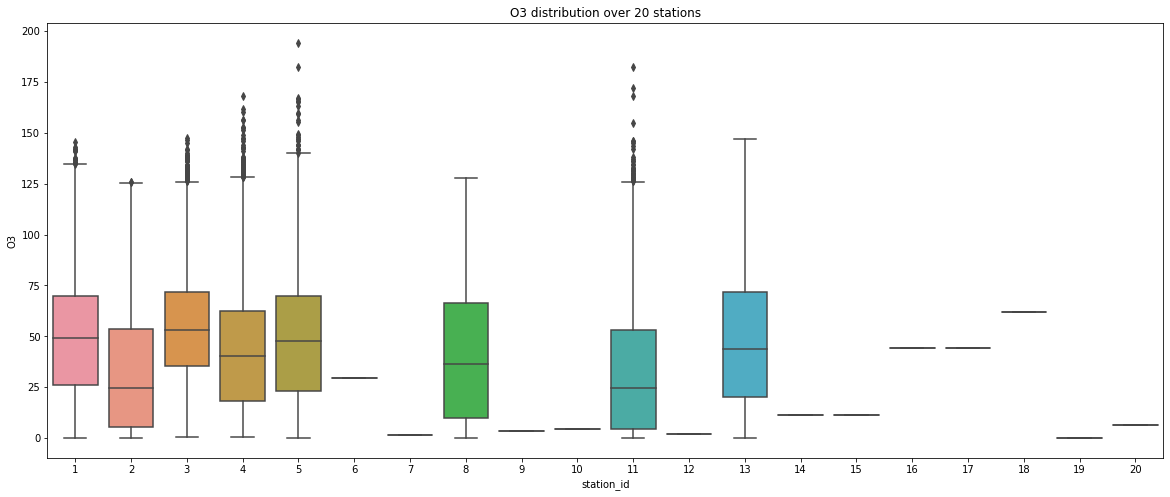

In [28]:
fig, ax = plt.subplots(figsize=(20,8))
sns_plot = sns.boxplot(x='station_id', y='O3', data=station_box,ax=ax).set_title('O3 distribution over 20 stations')
fig = sns_plot.get_figure()
fig.savefig("O3stations.png") 

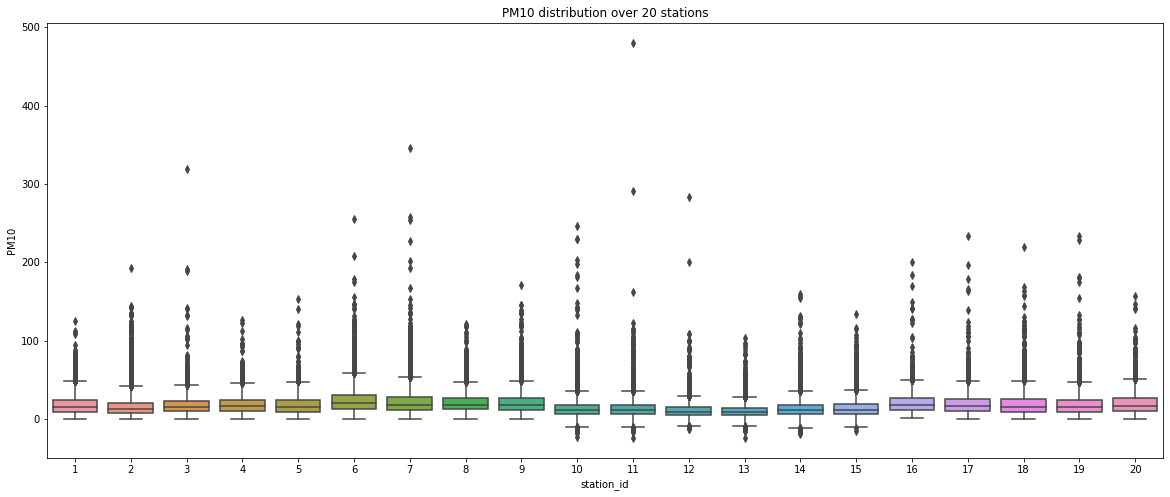

In [29]:
fig, ax = plt.subplots(figsize=(20,8))
sns_plot = sns.boxplot(x='station_id', y='PM10', data=station_box,ax=ax).set_title('PM10 distribution over 20 stations')
fig = sns_plot.get_figure()
fig.savefig("PM10stations.png") 

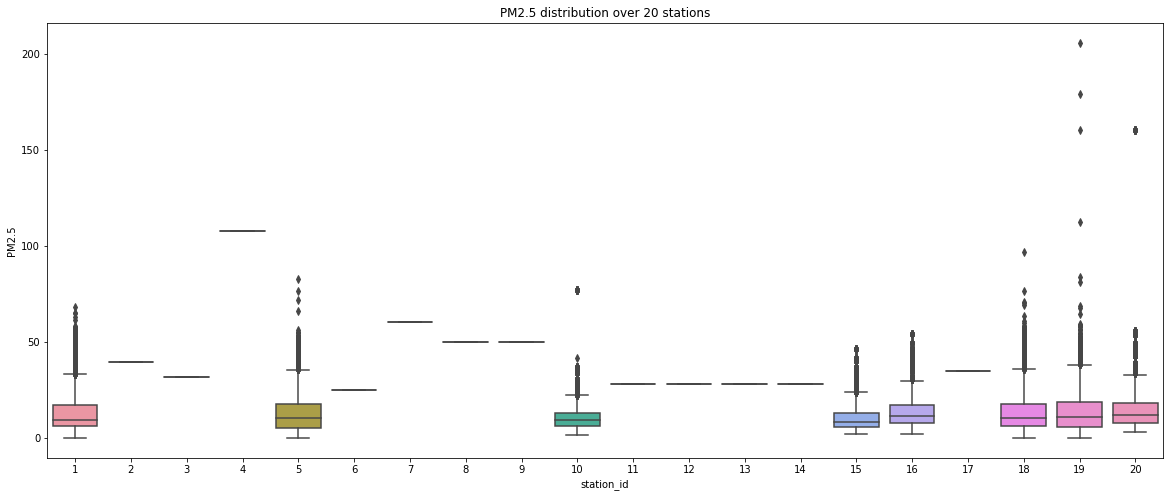

In [30]:
fig, ax = plt.subplots(figsize=(20,8))
sns_plot = sns.boxplot(x='station_id', y='PM2.5', data=station_box,ax=ax).set_title('PM2.5 distribution over 20 stations')
fig = sns_plot.get_figure()
fig.savefig("PM2.5stations.png") 

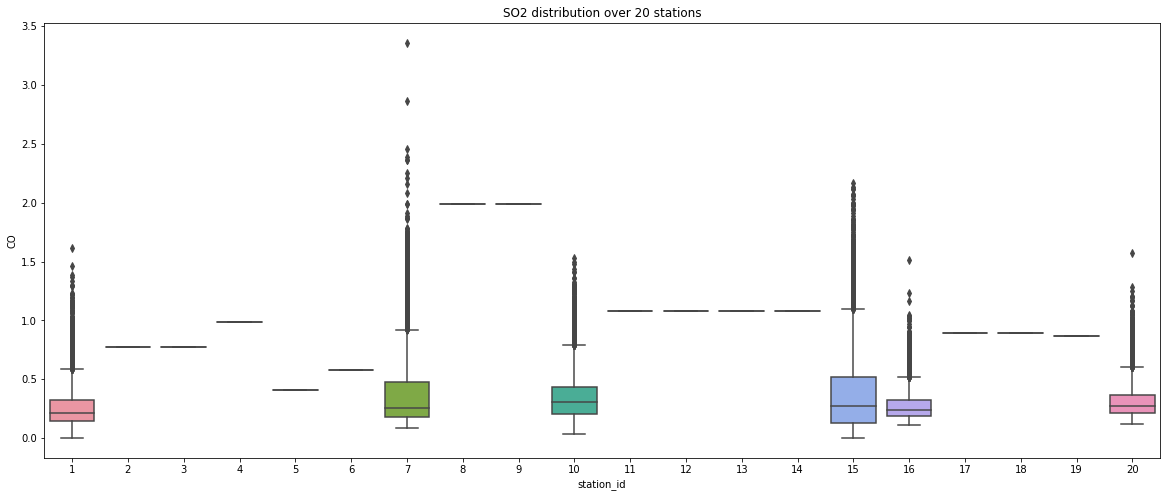

In [31]:
fig, ax = plt.subplots(figsize=(20,8))
sns_plot = sns.boxplot(x='station_id', y='CO', data=station_box,ax=ax).set_title('SO2 distribution over 20 stations')
fig = sns_plot.get_figure()
fig.savefig("SO2stations.png") 

In [32]:
x['CO'].describe()

count    175673.000000
mean          0.821774
std           0.504131
min           0.000000
25%           0.407400
50%           0.868684
75%           1.080296
max           3.358219
Name: CO, dtype: float64

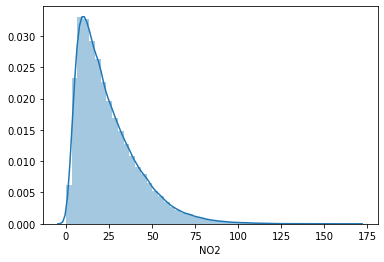

In [33]:
sns.distplot(x['NO2'])

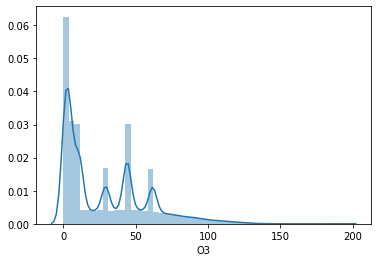

In [34]:
sns.distplot(x['O3'])

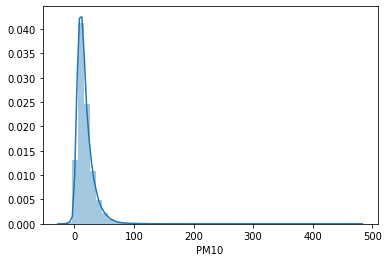

In [35]:
sns.distplot(x['PM10'])

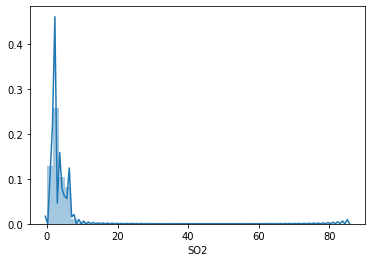

In [36]:
sns.distplot(x['SO2'])

Save preprocessed dataset

In [37]:
df.to_csv('air_pollution_austria_2016_20stations_all.csv')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
X = df_scaled.iloc[:,:-1]
y = df_scaled.iloc[:,-1]


In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, train_size=0.5)
model = LinearRegression(fit_intercept=True, normalize=True)

In [ ]:
y_predicted = model.fit(X_train,y_train).predict(X_test)

In [ ]:
y_predicted

In [ ]:
mean_absolute_error(y_test, y_predicted)